In [1]:
#Import cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = "/Users/brewaterman/Desktop/gwlevelst19.txt"
df = pd.read_csv(data, sep = "\t", comment = "#")
df.head(5)

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
0,5s,15s,6s,10d,5d,5s,12s,12s,10s,1s,5s,1s,1s,1s,1s,1s
1,USGS,384226099203801,GW,2009-11-18,14:35,CST,NaN,1909.14,NGVD29,NaN,USGS,m,2,S,S,A
2,USGS,384226099203801,GW,2009-12-21,14:25,CST,NaN,1909.61,NGVD29,NaN,USGS,m,2,S,S,A
3,USGS,384226099203801,GW,2010-02-23,10:15,CST,NaN,1909.51,NGVD29,NaN,USGS,m,2,S,S,A
4,USGS,384226099203801,GW,2010-04-06,11:00,CDT,NaN,1909.55,NGVD29,NaN,USGS,m,2,S,S,A


In [3]:
#pulling out neccessary columns
datawith0 = df[["site_no", "lev_dt", "sl_lev_va", "sl_datum_cd"]]
wellData = datawith0.drop(0)
wellData.head(5)
#wellData.info()
#datawith0

,site_no,lev_dt,sl_lev_va,sl_datum_cd
1,384226099203801,2009-11-18,1909.14,NGVD29
2,384226099203801,2009-12-21,1909.61,NGVD29
3,384226099203801,2010-02-23,1909.51,NGVD29
4,384226099203801,2010-04-06,1909.55,NGVD29
5,384226099203801,2010-07-01,1907.71,NGVD29


In [4]:
#Convert data to types 
wellData = wellData.astype({"sl_lev_va": float})
                       #"lev_dt": float})

In [5]:
#Level dates switches to years 
dates = pd.to_datetime(wellData["lev_dt"])
years = dates.dt.year

#add as col in df
wellData["Years"] = years
wellData.head()

,site_no,lev_dt,sl_lev_va,sl_datum_cd,Years
1,384226099203801,2009-11-18,1909.14,NGVD29,2009
2,384226099203801,2009-12-21,1909.61,NGVD29,2009
3,384226099203801,2010-02-23,1909.51,NGVD29,2010
4,384226099203801,2010-04-06,1909.55,NGVD29,2010
5,384226099203801,2010-07-01,1907.71,NGVD29,2010


In [6]:
#number of years active for well
yearsactive = years.unique() #.tolist()
yearsactive.size

11

In [7]:
yearsCalc = wellData.groupby('Years')
#yearsCalc.mean()
yearsCalc.agg(['count', 'min', 'max', 'std', 'mean']).head(15)

sl_lev_va                                         
          count      min      max       std         mean
Years                                                   
2009          2  1909.14  1909.61  0.332340  1909.375000
2010          8  1907.71  1909.55  0.642289  1908.722500
2011          7  1905.88  1909.40  1.494667  1907.795714
2012          9  1903.16  1907.29  1.626308  1905.354444
2013          7  1902.82  1907.47  1.874699  1904.354286
2014          5  1902.05  1906.16  1.800375  1904.440000
2015          7  1905.48  1908.16  1.233665  1906.974286
2016          5  1905.01  1908.99  1.882334  1907.356000
2017          7  1908.70  1909.68  0.338266  1909.152857
2018          6  1908.85  1910.44  0.561976  1909.388333
2019          2  1910.59  1910.76  0.120208  1910.675000

In [8]:
averageperyear = yearsCalc['sl_lev_va'].mean().sort_values(ascending=False)
print(averageperyear)

Years
2019    1910.675000
2018    1909.388333
2009    1909.375000
2017    1909.152857
2010    1908.722500
2011    1907.795714
2016    1907.356000
2015    1906.974286
2012    1905.354444
2014    1904.440000
2013    1904.354286
Name: sl_lev_va, dtype: float64


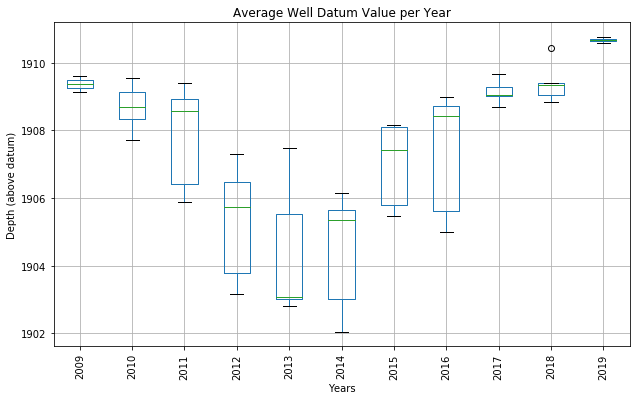

In [9]:
ax = wellData[['sl_lev_va', 'Years']].boxplot(
                by='Years', figsize=(10, 6), rot=90);
ax.set_xlabel('Years');
ax.set_ylabel('Depth (above datum)');
ax.set_title('Average Well Datum Value per Year');
plt.suptitle(''); 

#plt.savefig('gwlevels.jpg')